# DSCI 503 – Project 04
### Pradeep k Timsina

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import random
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

## Part 1: Loading the Dataset; Preliminary Analysis
### Loading data into variable fc and finding the distribution of cover_type variable

In [2]:
fc = pd.read_csv('forest_cover.txt', sep='\t')
fc.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,Rawah,29,5
1,2590,56,2,212,-6,390,220,235,151,6225,Rawah,29,5
2,2804,139,9,268,65,3180,234,238,135,6121,Rawah,12,2
3,2785,155,18,242,118,3090,238,238,122,6211,Rawah,30,2
4,2595,45,2,153,-1,391,220,234,150,6172,Rawah,29,5


### determining the size of the dataset. The shape gives the information that that dataframe has 15120 rows and 13 columns

In [3]:
fc.shape

(15120, 13)

### inspecting the distribution of cover types in the dataset

In [4]:
fc.loc[:,'Cover_Type']. value_counts().sort_index()

1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: Cover_Type, dtype: int64

### creating a list of seven colors to be used as a palette

In [5]:
palette = ['orchid', 'lightcoral', 'orange', 'gold', 'lightgreen', 'deepskyblue', 'cornflowerblue']

## Part 2: Distribution of Cover Type by Wilderness Area
### determining the relationship between cover type and wilderness area. 
###  first, finding the distribution of the wilderness areas in the  dataset

In [6]:
fc.loc[:,'Wilderness_Area']. value_counts().sort_index()

Cache la Poudre    4675
Comanche Peak      6349
Neota               499
Rawah              3597
Name: Wilderness_Area, dtype: int64

### creating a DataFrame to determine how many regions of each cover type are in each of the four wilderness areas

In [7]:
ct_by_wa = pd.crosstab(fc.Cover_Type,fc.Wilderness_Area)
ct_by_wa

Wilderness_Area,Cache la Poudre,Comanche Peak,Neota,Rawah
Cover_Type,,,,
1,0,917,181,1062
2,20,940,66,1134
3,1297,863,0,0
4,2160,0,0,0
5,0,1304,0,856
6,1198,962,0,0
7,0,1363,252,545


### visually representing the information in the DataFrame ct_by_wa in the form of a stacked bar chart 

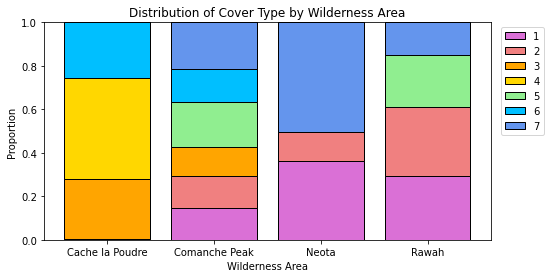

In [8]:
ct_by_wa_props = ct_by_wa / ct_by_wa.sum(axis=0)
bb = np.cumsum(ct_by_wa_props) - ct_by_wa_props
ct_by_wa_props
plt.figure(figsize=[8,4])
for itr in range(0,len(ct_by_wa_props)):
    plt.bar(x = ct_by_wa_props.columns, height=ct_by_wa_props.iloc[itr,:], bottom=bb.iloc[itr,:], 
            color=palette[itr], edgecolor='black', label = ct_by_wa_props.index[itr])
plt.xlabel('Wilderness Area')
plt.ylabel('Proportion')
plt.title('Distribution of Cover Type by Wilderness Area')
plt.legend(bbox_to_anchor=(1.13, 1.0))
plt.show()

## Part 3: Distribution of Cover Type by Soil Type
### exploring the relationship between cover type and soil type.
### creating a DataFrame to determine the number of regions of each cover type there are for each of the 40 soil types

In [9]:
ct_by_st = pd.crosstab(fc.Cover_Type,fc.Soil_Type)
ct_by_st

Soil_Type,1,2,3,4,5,6,8,9,10,11,...,31,32,33,34,35,36,37,38,39,40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,5,0,0,0,1,9,5,...,114,230,184,0,3,0,0,80,79,49
2,0,3,12,20,0,7,1,9,81,67,...,97,255,184,12,1,2,0,7,3,3
3,121,283,133,462,55,248,0,0,717,89,...,0,5,0,0,0,0,0,0,0,0
4,139,94,799,133,39,244,0,0,170,24,...,0,0,0,0,0,0,0,0,0,0
5,0,61,0,129,0,0,0,0,64,154,...,87,100,115,4,0,0,0,0,0,0
6,95,182,18,87,71,151,0,0,1101,67,...,7,30,66,2,0,0,0,0,0,0
7,0,0,0,7,0,0,0,0,0,0,...,27,70,67,4,98,8,34,641,575,407


### visually representing the information in the DataFrame ct_by_st in the form of a stacked bar chart

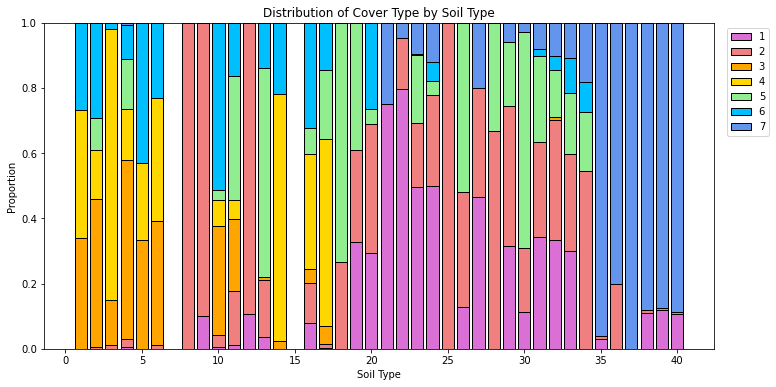

In [10]:
ct_by_st_props = pd.DataFrame(ct_by_st / np.sum(ct_by_st))

bb = np.cumsum(ct_by_st_props) - ct_by_st_props

plt.figure(figsize=[12,6])
for itr in range (0, len(ct_by_st_props)):
    plt.bar(x = ct_by_st_props.columns, height = ct_by_st_props.iloc[itr, : ], label = ct_by_st_props.index[itr], 
            color = palette[itr], edgecolor = 'black', bottom = bb.iloc[itr, :])
plt.legend(bbox_to_anchor=(1.09, 1.0))
plt.xlabel('Soil Type')
plt.ylabel('Proportion')
plt.title('Distribution of Cover Type by Soil Type')
plt.show()    

# Part 4: Distribution of Elevation by Cover Type
### exploring the relationship between cover type and elevation. 
### calculating the average elevation for each of the seven cover types

In [11]:
fc.loc[:,['Elevation','Cover_Type']].groupby('Cover_Type').mean()

,Elevation
Cover_Type,
1,3128.025926
2,2922.540278
3,2398.423148
4,2223.420370
5,2786.801389
6,2423.276852
7,3362.769907


### creating histograms to visually explore the distribution of elevations for each of the seven cover types

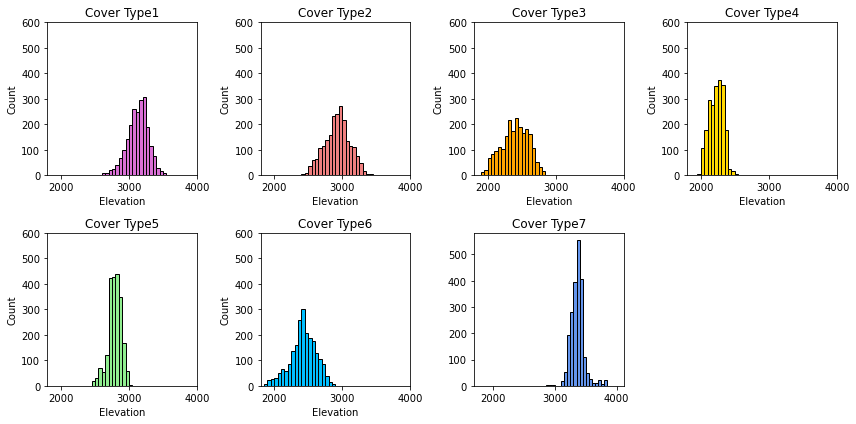

In [12]:
plt.figure(figsize=[12,6])
Cover_Type_list= fc.Cover_Type.unique()
Cover_Type_list.sort()
for itr in range(0,len(Cover_Type_list)):
    plt.xlim([1800, 4000])
    plt.ylim([0, 600])
    plt.xlabel('Elevation')
    plt.ylabel('Count')
    current_data = fc[fc['Cover_Type']==Cover_Type_list[itr]]
    plt.subplot(2,4,itr+1)
    plt.hist(current_data.Elevation , bins=np.arange(1800, 4050, 50),edgecolor='k',color=palette[itr])
    plt.title(f'Cover Type{Cover_Type_list[itr]}' )
plt.tight_layout()
plt.show()

# Part 5: Creating Training, Validation, and Test Sets
### starting by separating the categorical features, the numerical features, and the labels

In [13]:
X_num = (fc.loc[:,['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
                   'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
                   'Horizontal_Distance_To_Fire_Points']]).values
X_cat = (fc.loc[:,['Wilderness_Area', 'Soil_Type']]).values
y = (fc.loc[:,'Cover_Type']).values

print("Numerical Feature Array Shape:",X_num.shape)
print("Categorical Feature Array Shape:",X_cat.shape)
print("Label Array Shape:",y.shape)

Numerical Feature Array Shape: (15120, 10)
Categorical Feature Array Shape: (15120, 2)
Label Array Shape: (15120,)


### encoding the categorical variables using one-hot encoding. 


In [14]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(X_cat)
X_enc  = encoder.transform(X_cat)

print("Encoded Feature Array Shape: ",X_enc.shape)

Encoded Feature Array Shape:  (15120, 42)


### combining the numerical features with the encoded features.

In [15]:
X = np.hstack((X_num,X_enc))
print("Feature Array Shape:",X.shape)

Feature Array Shape: (15120, 52)


### now splitting the data into training, validation, and test sets, using a 70/15/15 split

In [16]:
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_hold, y_hold, test_size=0.5, random_state=1, stratify=y_hold)

print("Training Features Shape:  ", X_train.shape)
print("Validation Features Shape:", X_valid.shape)
print("Test Features Shape:\t  ",X_test.shape)

Training Features Shape:   (10584, 52)
Validation Features Shape: (2268, 52)
Test Features Shape:	   (2268, 52)


# Part 6: Logistic Regression Model
### creating and evaluating a logistic regression model.

In [17]:
lr_mod = LogisticRegression( solver='lbfgs', penalty = 'none', max_iter = 1000, multi_class='multinomial')
lr_mod.fit(X_train, y_train)
train_acc = lr_mod.score(X_train, y_train)
valid_acc = lr_mod.score(X_valid, y_valid)

print('Training Accuracy:', round(train_acc,4))
print('Validation Accuracy: ', round(valid_acc,4))

Training Accuracy: 0.6122
Validation Accuracy:  0.6182


C:\Users\pradi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Part 7: Decision Tree Models
creating and evaluating several decision tree models.

In [18]:
dt_train_acc = []
dt_valid_acc = []

depth_range = range(2,31)

for dpt in depth_range:
    np.random.seed(1)
    temp_tree = DecisionTreeClassifier(max_depth=dpt)
    temp_tree.fit(X_train, y_train)
    dt_train_acc.append(temp_tree.score(X_train, y_train))
    dt_valid_acc.append(temp_tree.score(X_valid, y_valid))
    
dt_idx = np.argmax(dt_valid_acc)

dt_opt_depth = depth_range[dt_idx]

tree = DecisionTreeClassifier(max_depth = dt_opt_depth)
tree.fit(X_train, y_train)

print('Optimal Value of max_depth:', dt_opt_depth)
print('Training Accuracy:         ', round(tree.score(X_train, y_train),4))
print('Validation Accuracy:       ', round(tree.score(X_valid, y_valid),4))


Optimal Value of max_depth: 18
Training Accuracy:          0.9804
Validation Accuracy:        0.7747


plotting the training and validation curves as a function of max_depth.

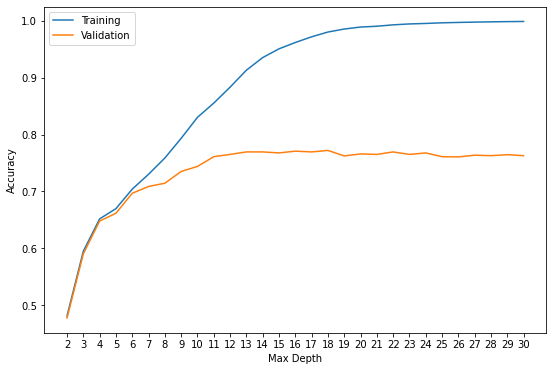

In [19]:
plt.figure(figsize=([9, 6]))

plt.plot(depth_range, dt_train_acc, label = 'Training')
plt.plot(depth_range, dt_valid_acc, label = 'Validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(depth_range)

plt.legend()
plt.show()

# Part 8: Random Forest Models

creating and evaluating several random forest models.

In [20]:
rf_train_acc = []
rf_valid_acc = []


for i in depth_range:
    np.random.seed(1)
    temp_forest = RandomForestClassifier(n_estimators=100, max_depth=i)
    temp_forest.fit(X_train, y_train)
    rf_train_acc.append(temp_forest.score(X_train, y_train))
    rf_valid_acc.append(temp_forest.score(X_valid, y_valid))

rf_idx = np.argmax(rf_valid_acc)
rf_opt_depth = depth_range[rf_idx]    
    
forest_mod = RandomForestClassifier(n_estimators=100, max_depth = rf_opt_depth)
forest_mod.fit(X_train, y_train)

print('Optimal Value of max_depth:', rf_opt_depth) 
print('Training Accuracy:         ', round(forest_mod.score(X_train, y_train),4))
print('Validation Accuracy:       ', round(forest_mod.score(X_valid, y_valid),4))   
    

Optimal Value of max_depth: 28
Training Accuracy:          1.0
Validation Accuracy:        0.8673


plotting the training and validation curves as a function of max_depth.

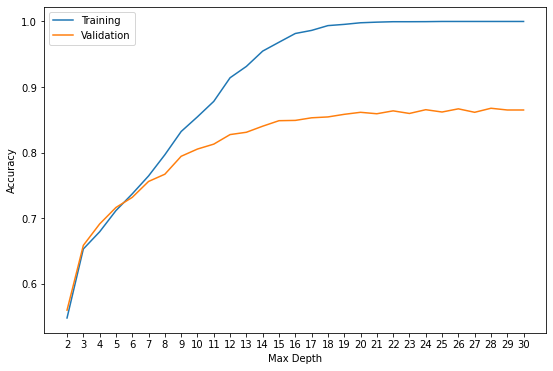

In [21]:
plt.figure(figsize=([9, 6]))

plt.plot(depth_range, rf_train_acc, label = 'Training')
plt.plot(depth_range, rf_valid_acc, label = 'Validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(depth_range)

plt.legend()
plt.show()

# Part 9: Create and Evaluate Final Model

selecting our final model, and will evaluating it on the test set. 

For this final model evaluation, using the random forest model as it appears to have the highest validation accuracy.

In [22]:
np.random.seed(1)
final_model = RandomForestClassifier(n_estimators=100, max_depth = rf_opt_depth)
final_model.fit(X_train, y_train)

print('Training Accuracy for Final Model:   ', round(final_model.score(X_train, y_train),4))
print('Validation Accuracy for Final Model: ', round(final_model.score(X_valid, y_valid),4))
print('Testing Accuracy for Final Model:    ', round(final_model.score(X_test, y_test),4))

Training Accuracy for Final Model:    1.0
Validation Accuracy for Final Model:  0.8677
Testing Accuracy for Final Model:     0.8593


creating and displaying a confusion matrix detailing the model's performance on the test set.

In [23]:
test_pred = final_model.predict(X_test)

conf = confusion_matrix(y_test, test_pred)
confusion_df = pd.DataFrame((conf), columns = ['1', '2', '3', '4', '5', '6', '7'])
confusion_df

,1,2,3,4,5,6,7
0,236,63,2,0,5,0,18
1,53,239,6,0,13,10,3
2,0,2,262,18,2,40,0
3,0,0,6,313,0,5,0
4,0,11,4,0,305,4,0
5,0,0,33,11,1,279,0
6,8,1,0,0,0,0,315


generating a classification report

In [24]:
classification_report(y_test, test_pred)

'              precision    recall  f1-score   support\n\n           1       0.79      0.73      0.76       324\n           2       0.76      0.74      0.75       324\n           3       0.84      0.81      0.82       324\n           4       0.92      0.97      0.94       324\n           5       0.94      0.94      0.94       324\n           6       0.83      0.86      0.84       324\n           7       0.94      0.97      0.95       324\n\n    accuracy                           0.86      2268\n   macro avg       0.86      0.86      0.86      2268\nweighted avg       0.86      0.86      0.86      2268\n'